In [1]:
using Plots

In [2]:
type Star
    id::Int
    m::Float64
    x::Array{Float64}
    xdot::Array{Float64}
    xddot::Array{Float64}
    r::Float64
    exists::Bool
end

In [3]:
function calc_acceleration!(stars)
    for star in stars
        if star.exists
            star.xddot = zeros(Float64, length(star.xddot))
            for star2 in stars
                if star.id != star2.id && star2.exists
                    star.xddot += G*star2.m/(+)(((star.x - star2.x).^2)...)^(3/2)*(star2.x - star.x)
                end
            end
        end
    end
end

calc_acceleration! (generic function with 1 method)

In [4]:
function move!(stars, dt)
    for star in stars
        if star.exists
            star.x += star.xdot * dt
            star.xdot += star.xddot * dt
        end
    end
end

move! (generic function with 1 method)

In [5]:
function collision!(stars)
    dim = length(stars[1].x)
    for star1 in stars
        for star2 in stars
            if star1.id < star2.id && (+)(((star1.x - star2.x).^2)...) < (star1.r + star2.r)^2 && star1.exists && star2.exists
                if star1.m >= star2.m
                    star2.exists = false
                    star2.xdot = zeros(Float64, dim)
                    star2.xddot = zeros(Float64, dim)
                    star1.xdot = (star1.m * star1.xdot  + star2.m * star2.xdot) / (star1.m + star2.m)
                    star1.m += star2.m
                else
                    star1.exists = false
                    star1.xdot = zeros(Float64, dim)
                    star1.xddot = zeros(Float64, dim)
                    star2.xdot = (star1.m * star1.xdot  + star2.m * star2.xdot) / (star1.m + star2.m)
                    star2.m += star1.m
                end
            end
        end
    end
end

collision! (generic function with 1 method)

In [6]:
function step!(stars, dt, steps; coll=true)
    dim = length(stars[1].x)
    logs = Array(Float64, steps, length(stars), 2*dim + 1)
    for i in 1:steps
        coll && collision!(stars)
        calc_acceleration!(stars)
        move!(stars, dt)
        for j in 1:length(stars)
            logs[i, j, 1:dim] = stars[j].x
            logs[i, j, dim+1:2*dim]  = stars[j].xdot
            logs[i, j, end]  = stars[j].m
        end
    end
    return logs
end

step! (generic function with 1 method)

In [7]:
Star(id, m, x, xdot, xddot) = Star(id, m, x, xdot, xddot, 1, true)
Star(id, m, x, xdot, xddot, r) = Star(id, m, x, xdot, xddot, r, true)

Star


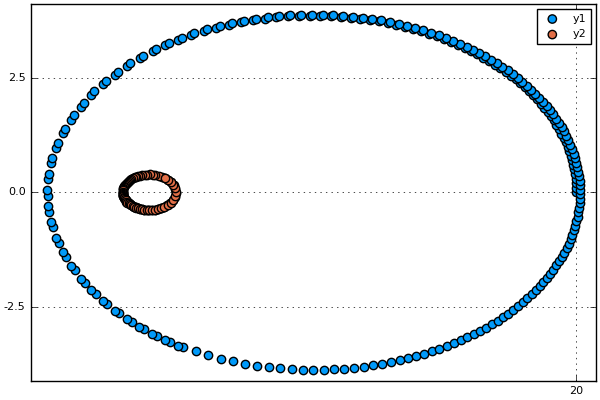

In [8]:
G = 5
star1 = Star(1, 10, [20, 0], [0, 5], [0, 0], 0.1, true)
star2 = Star(2, 100, [12, 0], [0, -0.5], [0, 0], 0.1, true)
stars = [star1, star2]
logs = step!(stars, 0.0001, 50000)
scatter(logs[:, 1, 1][1:200:end], logs[:, 1, 2][1:200:end])
scatter!(logs[:, 2, 1][1:500:end], logs[:, 2, 2][1:500:end])

In [9]:
pyplot(leg=false, ticks=nothing)
x = y = linspace(-5, 5, 40)
zs = zeros(0,40)

@gif for i in linspace(0, 2π, 100)
    f(x,y) = sin(x + 10sin(i)) + cos(y)

    # create a plot with 3 subplots and a custom layout
    l = @layout [a{0.7w} b; c{0.2h}]
    p = plot(x, y, f, st = [:surface, :contourf], layout=l)

    # add a tracking line
    fixed_x = zeros(40)
    z = map(f,fixed_x,y)
    plot!(p[1], fixed_x, y, z, line = (:black, 5, 0.2))
    vline!(p[2], [0], line = (:black, 5))

    # add to and show the tracked values over time
    zs = vcat(zs, z')
    plot!(p[3], zs, alpha = 0.2, palette = cgrad(:blues).colors)
end

LoadError: LoadError: InterruptException:
while loading In[9], in expression starting on line 6


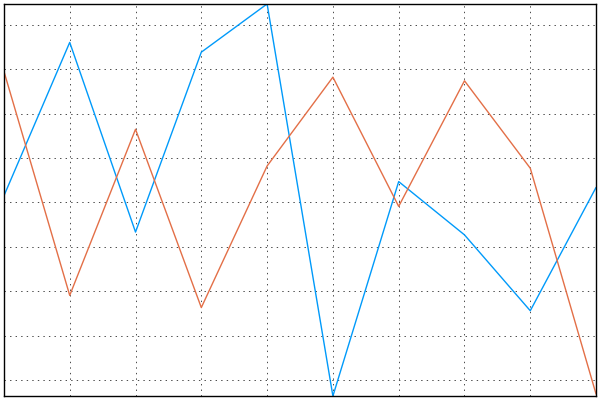

In [14]:
plot(rand(10))
plot!(rand(10))


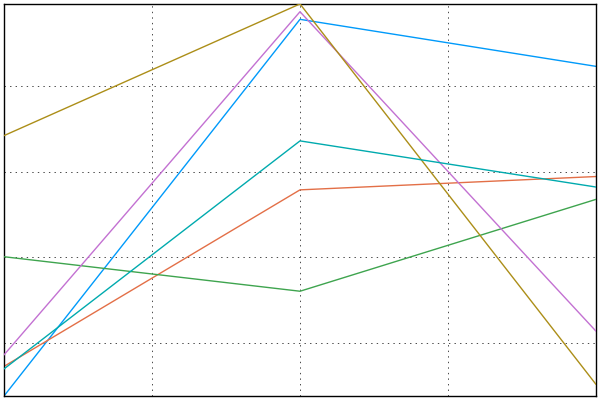

In [15]:
plot(rand(3, 6))


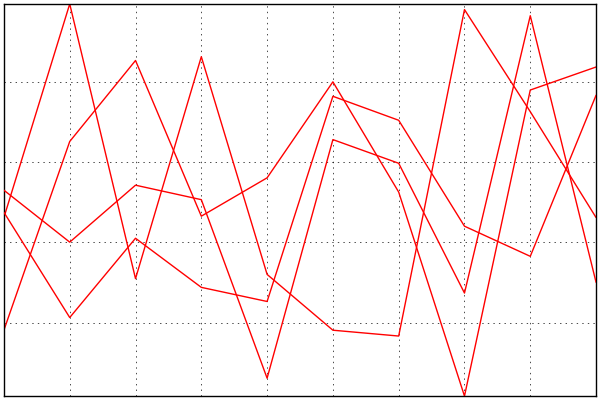

In [32]:
plot(rand(10,4), color = :red)


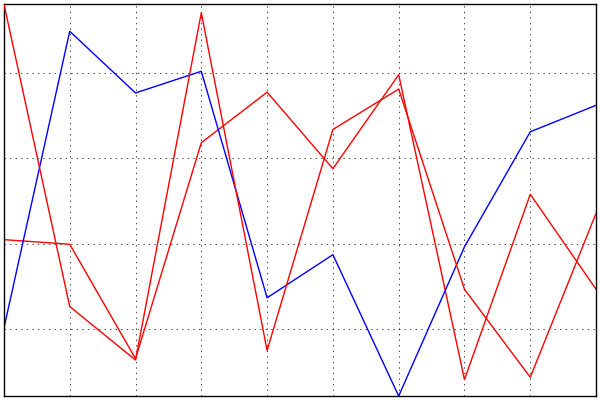

In [21]:
plot(rand(10,3), color = [:red :blue])

In [36]:
Vector([1, 2])

2-element Array{Int64,1}:
 1
 2

In [40]:
G = 5
star1 = Star(1, 10, [20, 0], [0, 5], [0, 0], 0.1, true)
star2 = Star(2, 100, [12, 0], [0, -0.5], [0, 0], 0.1, true)
stars = [star1, star2]
logs = step!(stars, 0.0001, 50000)
print()

In [41]:
plotly()
scatter(logs[:, 1, 1][1:200:end], logs[:, 1, 2][1:200:end])
scatter!(logs[:, 2, 1][1:500:end], logs[:, 2, 2][1:500:end])


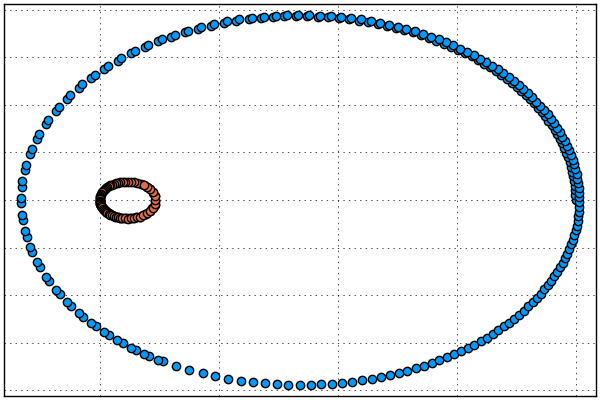

In [44]:
pyplot()
scatter(logs[:, 1, 1][1:200:end], logs[:, 1, 2][1:200:end])
scatter!(logs[:, 2, 1][1:500:end], logs[:, 2, 2][1:500:end])


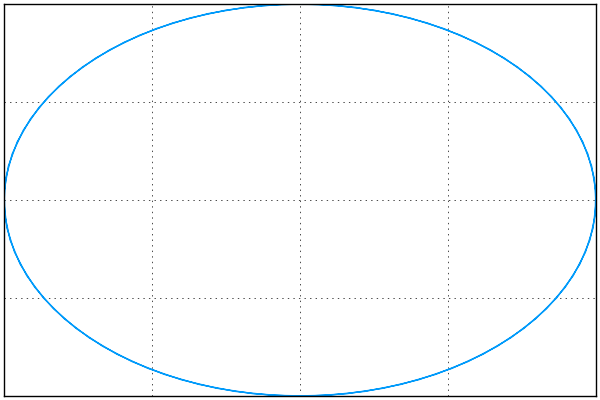

In [46]:
using Plots
tmin = 0
tmax = 4π
tvec = linspace(tmin, tmax, 100)

plot(sin(tvec), cos(tvec))


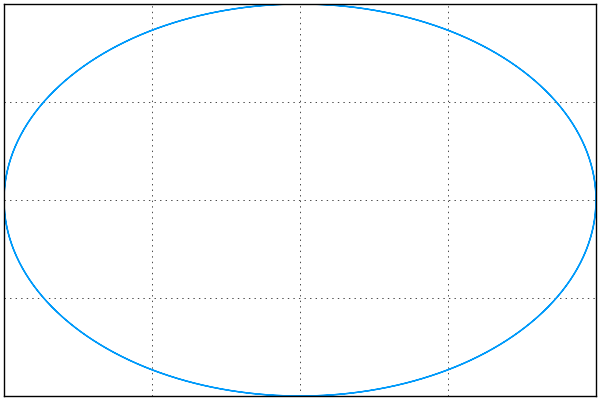

In [47]:
#plot(sin, cos, tvec)
plot(sin, cos, tmin, tmax)